## Script to generate figure 1

In [228]:
import sys
from pathlib import Path
sys.path.append(str(Path('.').resolve().parent))
import matplotlib.pyplot as plt
import module_ESN
import module_graph
import module_generate_data
from netgraph import Graph as plotGraph
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import netgraph
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib 
from netgraph._edge_layout import *
from netgraph._node_layout import get_fruchterman_reingold_layout, _remove_node_overlap
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

import numpy as np
## other option that does print double edges for when netgraph doesn't work
import numpy as np
import networkx as nx

In [229]:
param_grid = {
    'n': [15], 
    'trials': [50],
    'proxy_discard': [50],
    'goal_discard': [350],
    'measure_time': [50],
    'spectral_radius': [1.25],
    'alpha': [0.1],
    "avg_number_of_edges": [2],
    "number_of_action_nodes": [6],
    "seed": [5]                          # note that picking the seed is only ok because the goal of this figure is to be illustrative.
}
param_ESN = dict(zip(param_grid.keys(), [param_grid[k][0] for k in param_grid.keys()]))
esn = module_ESN.EchoStateNetwork(param_ESN['n'],  spectral_radius=param_ESN['spectral_radius'], alpha = param_ESN['alpha'], 
                            avg_number_of_edges=param_ESN['avg_number_of_edges'], proxy_discard=param_ESN['proxy_discard'],
                            goal_discard=param_ESN['goal_discard'], measure_time=param_ESN['measure_time'], 
                            seed=param_ESN['seed'],number_of_action_nodes=param_ESN['number_of_action_nodes'])



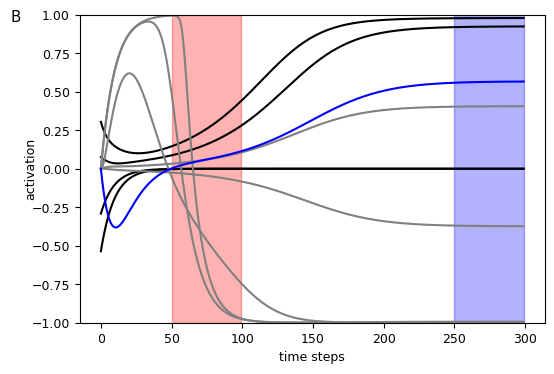

In [287]:


def plot_temporal(ax,ESN, proxy_node = None):
    G = module_graph.outputgraph(ESN.W)
    cmap = 'RdYlGn'
    n = max(G.nodes())
    colors = { node:  'b'*(node == n)+  'gray'*(ESN.number_of_action_nodes<=node and node<n) + 'k'*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    list_color = [ colors[i] if not proxy_node or i != proxy_node else 'r' for i in range(n+1)]
    actions = module_ESN.get_base_action_value(len(ESN.action_nodes))
    states = ESN.run( agent_values=actions)
    for k in range(n+1):
        p = ax.plot(states[:, k], color = list_color[k])
    ax.set_title('B', loc='left', x= -0.15, y = 0.95)
    ax.set_xlabel('time steps')
    ax.set_ylabel('activation', labelpad=-4)
    ax.set_ylim(-1,1)
    
    g = param_grid["goal_discard"][0]
    p =  param_grid["proxy_discard"][0]
    m = param_grid["measure_time"][0]
    ax.fill_between(range(g , g+m  ),-1, 1,  color = "b", alpha=0.3)
    ax.fill_between(range(p , p+m  ),-1, 1,  color = "r", alpha=0.3)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_temporal(ax,esn)

think about citing netgraph : Brodersen, P. J. N., (2023). Netgraph: Publication-quality Network Visualisations in Python. Journal of Open Source Software, 8(87), 5372, https://doi.org/10.21105/joss.05372


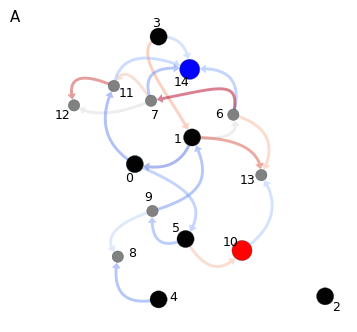

In [231]:
def plot_graph_cool_esn(ESN, ax, show_numbers = True, proxy_node = None ):
    G = module_graph.outputgraph(ESN.W)
    cmap = 'coolwarm'
    n = max(G.nodes())
    colors = { node:  'b'*(node == n)+  'gray'*(ESN.number_of_action_nodes<=node and node<n) + 'k'*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    sizess = { node:  3.5*(node == n)+  2*(ESN.number_of_action_nodes<=node and node<n) + 3*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    if proxy_node :
        colors[proxy_node] = 'r'
        sizess[proxy_node] = 3.5
    labs = {node: str(node) for node in G.nodes() if show_numbers}
    plotGraph(G, ax= ax, node_size=sizess,edge_width=1,node_edge_width = 0.1,arrows = True, directed= True, edge_cmap=cmap, node_color=colors, node_labels = labs,
              node_label_offset=0.05, node_alpha=0.99, 
              edge_layout = "curved", 
              node_layout='spring',
              seed = 0)
    ax.set_title('A', loc='left', x= -0.15, y = 0.95)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_graph_cool_esn(esn, ax, show_numbers=True, proxy_node=10)

print("think about citing netgraph : Brodersen, P. J. N., (2023). Netgraph: Publication-quality Network Visualisations in Python. Journal of Open Source Software, 8(87), 5372, https://doi.org/10.21105/joss.05372")

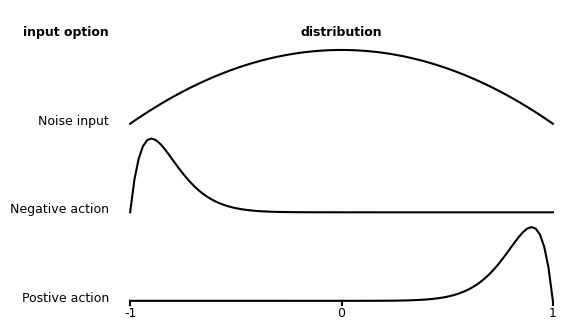

In [232]:
def plot_beta_distributions(ax, input_type = "noise"):
    a_list = [20,2,2]
    b_list = [2,20,2]
    l_list = ["Postive action","Negative action",'Noise input']
    i = np.linspace(0, 1, 100)

    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    ax.spines[:].set_visible(False)
    for k in range(3):
        y = beta.pdf(i, a_list[k], b_list[k])
        Y = y/np.max(y) + k*1.2
        X = i * 2 - 1
        ax.plot(X, Y, color = "k")

        ax.text(X[0]-0.1, Y[0], l_list[k],horizontalalignment='right')

    ax.text(X[0]-0.1, (k+1)*1.2, "input option",horizontalalignment='right', fontweight='bold')
    ax.text(X[0]+1, (k+1)*1.2, "distribution",horizontalalignment='center', fontweight='bold')

    for x in [-1, 0, 1]:
        ax.plot([x, x], [0, -0.05], color="black")

    # Add custom labels
    for x, label in zip([-1, 0, 1], ["-1", "0", "1"]):
        ax.text(x, -0.07, label, ha="center", va="top")

    
    
    

    lim = ax.get_ylim()
    ax.set_ylim(lim[0] ,lim[1]+ 0.1*(lim[1]- lim[0]))
    #ax.vlines(X[0]-0.05,lim[0],lim[1]+ 0.1*(lim[1]- lim[0]), linewidth = 1)
    limx = ax.get_xlim()
    #ax.hlines((k+1)*1.2-0.05,-2,limx[1], linewidth = 1)
    
    

    

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_beta_distributions(ax)

(np.float64(6.666666666666667), np.float64(2.0)) 10.0 3.0
{0: array([4.06240916, 0.1       ]), 1: array([3.40793485, 1.52374283]), 2: array([4.93814051, 1.85253433]), 3: array([1.72852616, 1.85253433]), 4: array([3.09806903, 0.96691777]), 5: array([2.52145068, 1.54927535]), 6: array([3.83736019, 0.84552293]), 7: array([4.56691593, 1.36732226]), 8: array([4.25704223, 1.9       ]), 9: array([3.48653861, 0.3124316 ])}
3.8055757873007616 2.222
miss_x 5.823090879365906
9.628666666666668 2.8886000000000003


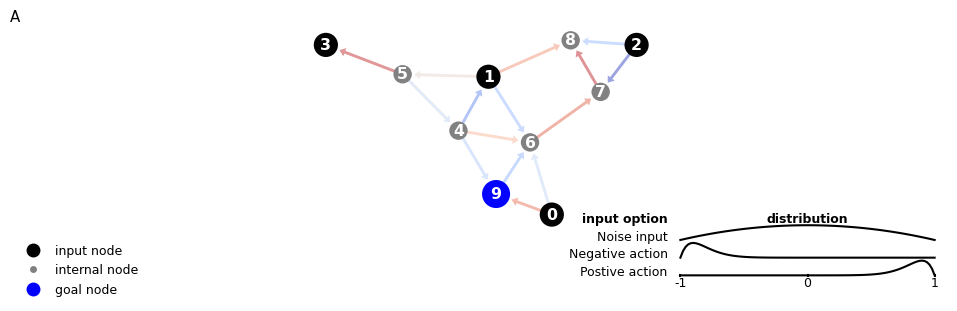

In [282]:

def plot_graph_cool_esn_2(ESN, ax11, prop, show_numbers = False, proxy_node = None):
    node_size = 5.0
    G = module_graph.outputgraph(ESN.W)
    cmap = 'coolwarm'
    H = G.__class__()                     # keeps Graph vs DiGraph
    H.add_nodes_from(G.nodes(data=True))   # copy node attrs
    H.add_edges_from(
        (u, v, {k: val for k, val in d.items() if k != "weight"})
        for u, v, d in G.edges(data=True))
    n = max(G.nodes())


    fig_w, fig_h = ax11.figure.get_size_inches()
    ax_w =  (fig_w) *2/3
    ax_h =  (fig_h) *2/3
    scale = (ax_w,ax_h)
    print(scale, fig_w,fig_h)

    np.random.seed(1)
    pos = get_fruchterman_reingold_layout(list(H.edges()) , scale = scale) 
    z = 0
    for k in range(n):
        if k not in pos.keys():
            pos[k] = np.array([0, z*6])
            z += 1
    print(pos)
    pos2 = pos #{k: np.array([a[0], a[1] + 0.2 * fig_h]) for k, a in pos.items()}

    edge_paths = get_curved_edge_paths(list(G.edges()), pos2, node_size=node_size)
    for (a,b), path in edge_paths.items():
        if a< b and (b,a) in edge_paths:
           edge_paths[(b,a)] = path[::-1] 
    colors = { node:  'b'*(node == n)+  'gray'*(ESN.number_of_action_nodes<=node and node<n) + 'k'*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    sizess = { node:  17*(node == n)+  12*(ESN.number_of_action_nodes<=node and node<n) + 15*(node <ESN.number_of_action_nodes )   for node in G.nodes() }
    if proxy_node :
        colors[proxy_node] = 'r'
        sizess[proxy_node] = 17
    labs = {node: str(node) for node in G.nodes() if show_numbers}
    plotGraph(G, ax = ax11,
              node_layout=pos2,
              edge_layout=edge_paths,
              node_size=sizess,
              edge_width=3.,
              node_edge_width=5,
              arrows=True,
              directed=True,
              edge_cmap=cmap,
              node_color=colors,
              node_edge_color= "none",
              node_labels=labs,
              node_label_fontdict= {"color":'white', 'weight':'bold'},
              node_label_offset=0,
              node_alpha=0.99 , scale = scale)
    
    handles, labels = ax11.get_legend_handles_labels()
    node = Line2D([0], [0], label='internal node', marker='.', markersize=10, markeredgecolor= 'none', markerfacecolor='gray', linestyle='')
    input = Line2D([0], [0], label='input node', marker='.', markersize=20, markeredgecolor= 'none', markerfacecolor='k', linestyle='')
    goal = Line2D([0], [0], label='goal node', marker='.', markersize=20, markeredgecolor= 'none', markerfacecolor='b', linestyle='')
    handles.extend([  input,node])

    if  proxy_node :
        proxy = Line2D([0], [0], label='proxy node', marker='.', markersize=20, markeredgecolor= 'none', markerfacecolor='r', linestyle='')
        handles.extend([ proxy])
    handles.extend([goal])
    ax11.legend(handles=handles, ncol = 1, loc = (0,0),frameon = False)
    ax11.set_title('A', y = 1, x = 0, pad = 0)
    mult_for_space = 0.3
    limy,limx = ax11.get_ylim() ,ax11.get_xlim()
    spany, spanx = limy[1]- limy[0], limx[1]- limx[0]
    print(spanx ,spany)
    
    ax11.set_ylim(limy[0] - mult_for_space*(spany),limy[1])
    miss_x = (spany*(1+mult_for_space))*ax_w/ax_h- spanx 
    print("miss_x",miss_x, )
    ax11.set_xlim(-miss_x/2 + limx[0],+miss_x/2 + limx[1] )


    limy,limx = ax11.get_ylim() ,ax11.get_xlim()
    spany, spanx = limy[1]- limy[0], limx[1]- limx[0]
    print(spanx ,spany)

    ax_histA = ax11.inset_axes([1-prop, 0.08, prop, mult_for_space-0.08])
    ax_histA.tick_params(direction='in')
    plot_beta_distributions(ax_histA)


fig = plt.figure(layout = "constrained", figsize =(10,3))
gs00 = gridspec.GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs00[:,0])
plot_graph_cool_esn_2(esn, ax1,0.3, show_numbers=True)

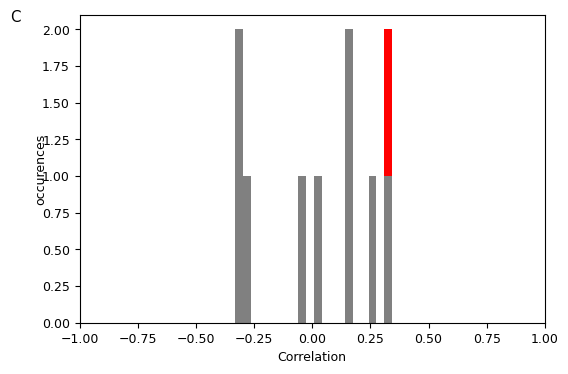

In [283]:
def plot_correlations(correlations,ax):
    L = sorted(correlations)
    ax.hist([L[:-1], L[-1:]], color =['gray','r'], stacked = True, bins = 20)
    ax.set_xlim(-1, 1)
    ax.set_title('C', loc='left', x= -0.15, y = 0.95)
    ax.set_xlabel('Correlation')
    ax.set_ylabel('occurences', labelpad=-4)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_correlations(np.random.normal(0,0.3, 10) ,ax)
fig.savefig("figures_output/correlation.svg", format="svg", bbox_inches="tight", pad_inches=0.02, transparent=True)

In [284]:
## function to compute all data for the step by step optimization and display 

def optimize_node(esn,  trials, proxy_nodes, is_goal=False):

    n = esn.n 
    num_action_nodes = len(esn.action_nodes)
    start_time = esn.proxy_discard*(not is_goal) + esn.goal_discard*is_goal
    end_time = start_time + esn.measure_time
    # define function to test an agent action 
    def test_agent_action(agent_action, action_value):
        """
        Test the average value of an action node if all other nodes are set to random values
        """
        proxy_samples    = np.asarray([])
        goal_samples    = np.asarray([])
        esn.reset_seed()
        for j in range(trials): 
            action_node_values = module_ESN.get_directed_action_value(action_value , agent_action, actionsize = len(esn.action_nodes))
            states = esn.run(agent_values=action_node_values)
            proxy_samples = np.concatenate((proxy_samples,np.mean(states[start_time:end_time, proxy_nodes], axis=0)))
            goal_samples = np.concatenate((goal_samples,np.mean(states[esn.goal_discard:esn.goal_discard+esn.measure_time, esn.goal], axis=0)))
        if not is_goal:
            correl_node_goal = np.corrcoef(proxy_samples, goal_samples)[0, 1]
        else:
            correl_node_goal = 0

        return np.mean(proxy_samples), np.mean(goal_samples), correl_node_goal, proxy_samples, goal_samples
    max_proxy_value = -1
    goal_value_on_max_proxy = -1
    correlation_on_max_proxy = 0
    mean_proxy_list = []
    for i in range(num_action_nodes):
        for val in [-1, 1]:
            proxy_value, goal_value, correl_node_goal, proxy_samples, goal_samples = test_agent_action(i, val)
            mean_proxy_list.append(proxy_value) # for fig D 
            if proxy_value > max_proxy_value:
                max_proxy_value = proxy_value
                goal_value_on_max_proxy = goal_value
                correlation_on_max_proxy = correl_node_goal
                max_prox_samples = proxy_samples
                max_goal_samples = goal_samples

    return (goal_value_on_max_proxy, max_proxy_value, correlation_on_max_proxy, mean_proxy_list, max_prox_samples, max_goal_samples)

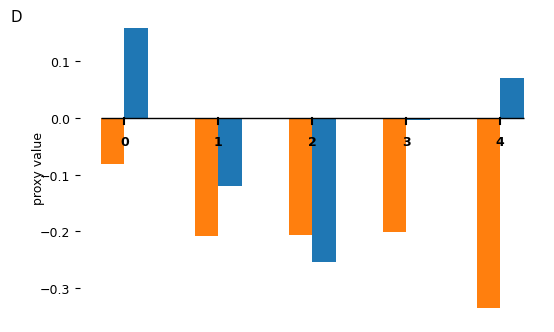

In [311]:
def histogram_goodactions(ax, L):
    nAction = len(L)//2
    Xplus = [k for k in range(nAction)]
    Xmoins = [k-0.25 for k in range(nAction)]
    negative_actions = L[::2]
    positive_actions =  L[1::2]
    ax.bar(Xplus,positive_actions, width= 0.25, align = "edge")
    ax.bar(Xmoins,negative_actions, width= 0.25, align = "edge")
    ax.set_ylabel('proxy value', labelpad=-4)
    #ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])
    ax.spines[:].set_visible(False)
    for x in Xplus:
        ax.plot([x, x], [0, -0.01], color="black")
    ax.hlines(0,-0.25,nAction-1+0.25,'k', linewidth = 1) 
    # Add custom labels
    for x in Xplus:
        ax.text(x, -0.03, str(x), ha="center", va="top", fontweight = 'bold')
    
    ax.set_title('D', loc='left', x= -0.15, y = 0.95)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
histogram_goodactions(ax, np.random.normal(0,0.3, 10))

## Full figure now

(np.float64(5.513333333333333), np.float64(2.5977777777777775)) 8.27 3.8966666666666665
{0: array([1.15845752, 0.73727363]), 1: array([2.89893171, 0.91924706]), 2: array([2.61418799, 2.46788889]), 3: array([4.35487581, 0.73727363]), 4: array([2.56200428, 0.22391525]), 5: array([3.56434351, 0.33604146]), 6: array([1.97061554, 0.88071208]), 7: array([2.09717859, 1.95539008]), 8: array([2.881579  , 1.91587881]), 9: array([1.62537178, 0.12988889])}
3.7910601119330734 2.8687999999999994
miss_x 4.1240302559026825
7.915090367835756 3.7294399999999994


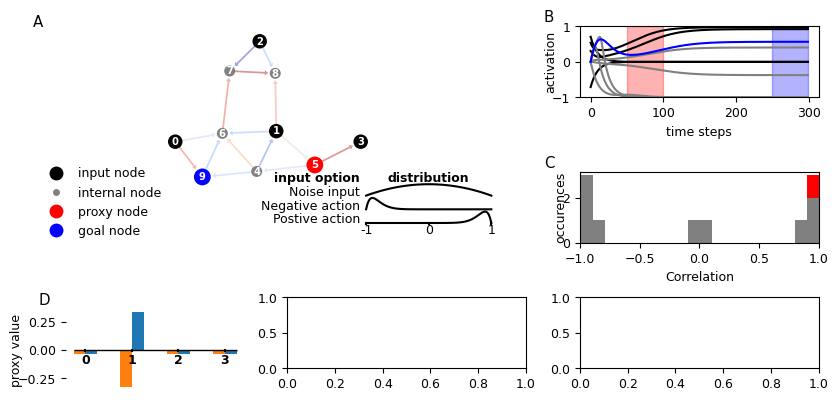

In [316]:

param_grid = {
    'n': [10], 
    'trials': [50],
    'proxy_discard': [50],
    'goal_discard': [250],
    'measure_time': [50],
    'spectral_radius': [1.25],
    'alpha': [0.1],
    "avg_number_of_edges": [2],
    "number_of_action_nodes": [4],
    "seed": [6]                          # note that picking the seed is only ok because the goal of this figure is to be illustrative.
}
param_ESN = dict(zip(param_grid.keys(), [param_grid[k][0] for k in param_grid.keys()]))
esn = module_ESN.EchoStateNetwork(param_ESN['n'],  spectral_radius=param_ESN['spectral_radius'], alpha = param_ESN['alpha'], 
                            avg_number_of_edges=param_ESN['avg_number_of_edges'], proxy_discard=param_ESN['proxy_discard'],
                            goal_discard=param_ESN['goal_discard'], measure_time=param_ESN['measure_time'], 
                            seed=param_ESN['seed'],number_of_action_nodes=param_ESN['number_of_action_nodes'])

proxy_nodes, goal_value, proxy_value, correlations, bin_indices = module_generate_data.compute_proxy_nodes_from_esn(esn)
goal_value_on_max_proxy, max_proxy_value, correlation_on_max_proxy, mean_proxy_list, max_prox_samples, max_goal_samples = optimize_node(esn,  40, proxy_nodes, is_goal=False)



matplotlib.rcParams.update({'font.size': 9})
fig = plt.figure(layout = "constrained", figsize =(8.27,11.69/3))
gs = fig.add_gridspec(2, 2, left=0.1, right=0.95, top=0.95, bottom=0.1, wspace=0.3, hspace=0.3)

gs = gridspec.GridSpec(3, 3, figure=fig)

ax11 = fig.add_subplot(gs[:2,:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2, 0], width_ratios=[1])
ax4 = fig.add_subplot(gs00[0, 0])
ax5 = fig.add_subplot(gs[2:,1])
ax6 = fig.add_subplot(gs[2, 2])



#fig, ((ax1,ax2,ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, )
plot_graph_cool_esn_2(esn, ax11, 0.3,proxy_node=proxy_nodes[0], show_numbers=True)
#plot_beta_distributions(ax2)
plot_temporal(ax2,esn)
plot_correlations(correlations,ax3)
histogram_goodactions(ax4, mean_proxy_list)
#plot_graph_cool_esn_2(esn, ax5,proxy_node=proxy_nodes[0] )
#plot_beta_distributions(ax5,False)



(np.float64(5.513333333333333), np.float64(2.5977777777777775)) 8.27 3.8966666666666665
{0: array([1.15845752, 0.73727363]), 1: array([2.89893171, 0.91924706]), 2: array([2.61418799, 2.46788889]), 3: array([4.35487581, 0.73727363]), 4: array([2.56200428, 0.22391525]), 5: array([3.56434351, 0.33604146]), 6: array([1.97061554, 0.88071208]), 7: array([2.09717859, 1.95539008]), 8: array([2.881579  , 1.91587881]), 9: array([1.62537178, 0.12988889])}
3.7910601119330734 2.8687999999999994
miss_x 4.1240302559026825
7.915090367835756 3.7294399999999994


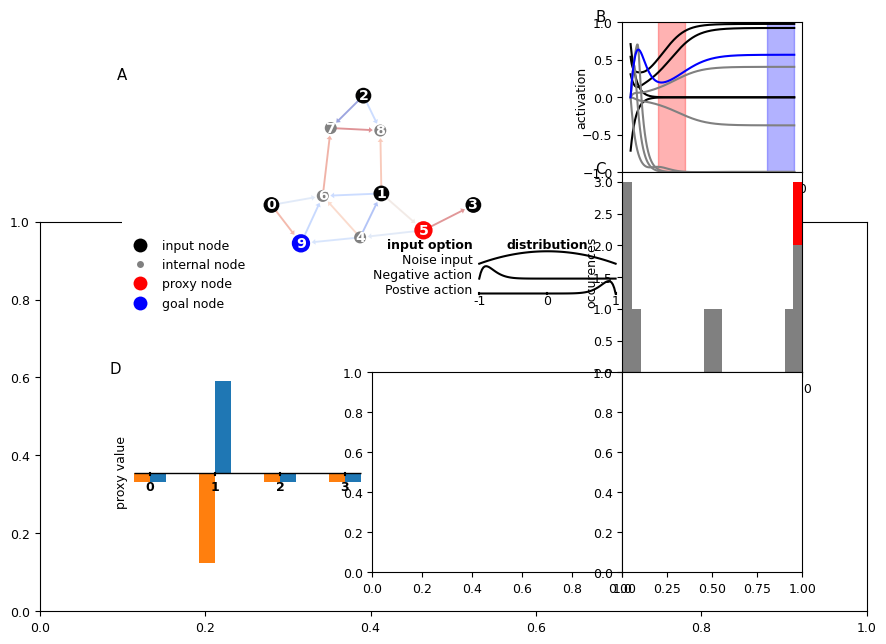

In [307]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import Divider, Size

plt.rcParams.update({'font.size': 9})

fig = plt.figure(figsize=(8.27, 11.69/3))

# Temporary axes used only for Size.AxesX / Size.AxesY
dummy = fig.add_axes([0, 0, 1, 1])

# --- Define horizontal sizes (3 columns) ---
# You can tune these Fixed sizes to match your GridSpec proportions
h = [
    Size.Fixed(2.5),        # column 0 width
    Size.Fixed(2.5),        # column 1 width
    Size.Fixed(1.8)         # column 2 width
]

# --- Define vertical sizes (3 rows) ---
v = [
    Size.Fixed(2.0),        # row 0 height
    Size.Fixed(2.0),        # row 1 height
    Size.Fixed(1.5)         # row 2 height
]

# Create divider
divider = Divider(fig, (0.1, 0.1, 0.85, 0.85), h, v, aspect=False)

# Helper to create axes in grid cell (nx, ny)
def add_ax(nx, ny, rowspan=1, colspan=1):
    ax = fig.add_axes(divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=nx, ny=ny, nx1=nx+colspan, ny1=ny+rowspan))
    return ax

# --- Recreate your GridSpec layout ---

# ax11 spans rows 0–1 and cols 0–1
ax11 = add_ax(0, 1, rowspan=2, colspan=2)

# ax2 at (row 0, col 2)
ax2 = add_ax(2, 2)

# ax3 at (row 1, col 2)
ax3 = add_ax(2, 1)

# ax4 at (row 2, col 0)
ax4 = add_ax(0, 0)

# ax5 spans (row 2, col 1)
ax5 = add_ax(1, 0)

# ax6 at (row 2, col 2)
ax6 = add_ax(2, 0)
plot_graph_cool_esn_2(esn, ax11, 0.3,proxy_node=proxy_nodes[0], show_numbers=True)
#plot_beta_distributions(ax2)
plot_temporal(ax2,esn)
plot_correlations(correlations,ax3)
histogram_goodactions(ax4, mean_proxy_list)


AttributeError: 'Figure' object has no attribute 'transAxes'

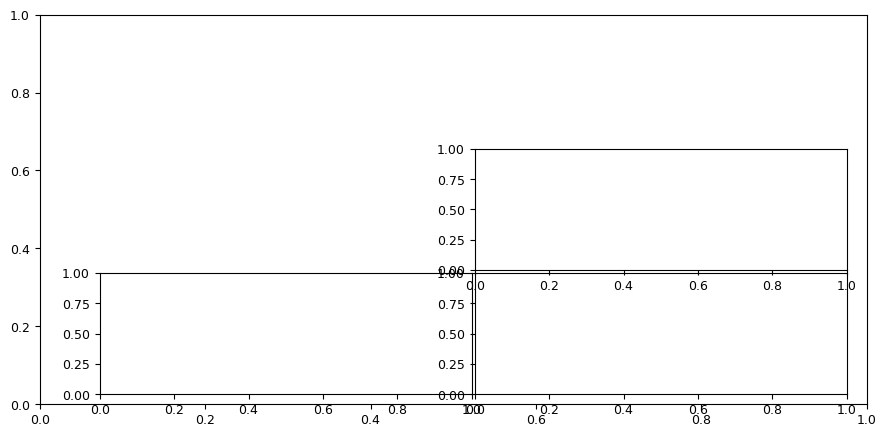

In [ ]:

param_grid = {
    'n': [10], 
    'trials': [50],
    'proxy_discard': [50],
    'goal_discard': [250],
    'measure_time': [50],
    'spectral_radius': [1.25],
    'alpha': [0.1],
    "avg_number_of_edges": [2],
    "number_of_action_nodes": [4],
    "seed": [6]                          # note that picking the seed is only ok because the goal of this figure is to be illustrative.
}
param_ESN = dict(zip(param_grid.keys(), [param_grid[k][0] for k in param_grid.keys()]))
esn = module_ESN.EchoStateNetwork(param_ESN['n'],  spectral_radius=param_ESN['spectral_radius'], alpha = param_ESN['alpha'], 
                            avg_number_of_edges=param_ESN['avg_number_of_edges'], proxy_discard=param_ESN['proxy_discard'],
                            goal_discard=param_ESN['goal_discard'], measure_time=param_ESN['measure_time'], 
                            seed=param_ESN['seed'],number_of_action_nodes=param_ESN['number_of_action_nodes'])

proxy_nodes, goal_value, proxy_value, correlations, bin_indices = module_generate_data.compute_proxy_nodes_from_esn(esn)
goal_value_on_max_proxy, max_proxy_value, correlation_on_max_proxy, mean_proxy_list, max_prox_samples, max_goal_samples = optimize_node(esn,  40, proxy_nodes, is_goal=False)

matplotlib.rcParams.update({'font.size': 9})
from mpl_toolkits.axes_grid1 import Divider, Size
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize =(8.27,11.69/3))
# anchor axes used by Divider to measure 'Axes' sizes (inclusion of ticks/labels)
ax_anchor = fig.add_axes([0, 0, 1, 1])
# horizontal sizes: left margin, main column, small gap, right column, right margin
h = [Size.Fixed(0.6), Size.AxesX(ax_anchor), Size.Fixed(0.03), Size.AxesX(ax_anchor), Size.Fixed(0.2)]
# vertical sizes: bottom margin, top block, gap, middle block, gap, bottom block, top margin
v = [Size.Fixed(0.1), Size.AxesY(ax_anchor), Size.Fixed(0.03), Size.AxesY(ax_anchor), Size.Fixed(0.03), Size.AxesY(ax_anchor), Size.Fixed(0.1)]
divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# Main large graph on the left (occupies the large left area)
ax11 = fig.add_axes(divider.get_position())
ax11.set_axes_locator(divider.new_locator(nx=1, ny=1))
# Right column: two stacked axes (top temporal, middle correlations)
ax2 = fig.add_axes(divider.get_position())
ax2.set_axes_locator(divider.new_locator(nx=3, ny=1))
ax3 = fig.add_axes(divider.get_position())
ax3.set_axes_locator(divider.new_locator(nx=3, ny=3))
# Bottom row: three compact axes created as insets so they fit tightly without leaving large blanks
ax4 = inset_axes(fig, width="30%", height="30%", bbox_to_anchor=(0.03, 0.03, 0.28, 0.28), bbox_transform=fig.transFigure, loc='lower left', borderpad=0)
ax5 = inset_axes(fig, width="30%", height="30%", bbox_to_anchor=(0.365, 0.03, 0.28, 0.28), bbox_transform=fig.transFigure, loc='lower left', borderpad=0)
ax6 = inset_axes(fig, width="30%", height="30%", bbox_to_anchor=(0.7, 0.03, 0.28, 0.28), bbox_transform=fig.transFigure, loc='lower left', borderpad=0)
# Plot into the axes (same plotting functions as before)
plot_graph_cool_esn_2(esn, ax11, 0.3, proxy_node=proxy_nodes[0], show_numbers=True)
plot_temporal(ax2, esn)
plot_correlations(correlations, ax3)
histogram_goodactions(ax4, mean_proxy_list)
# leave ax5/ax6 free for optional panels or thumbnails
